# Wine Quality Analysis(Major Project)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error

In [8]:
#importing the dataset to pandas dataframe
import pandas as pd
df = pd.read_csv(r"D:\Users\arifa\Downloads\ddmp.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [9]:
#first five rows of the dataframe
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [10]:
#last five rows of the dataframe
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.52,0.66,11.0,6.0


In [11]:
#Number of rows and columns in the dataframe
df.shape

(1599, 12)

In [13]:
#row index labels
df.index

RangeIndex(start=0, stop=1599, step=1)

In [14]:
#concise summary of dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [16]:
#Statistical summary of dataframe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [23]:
#data types of all columns of the dataframe
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

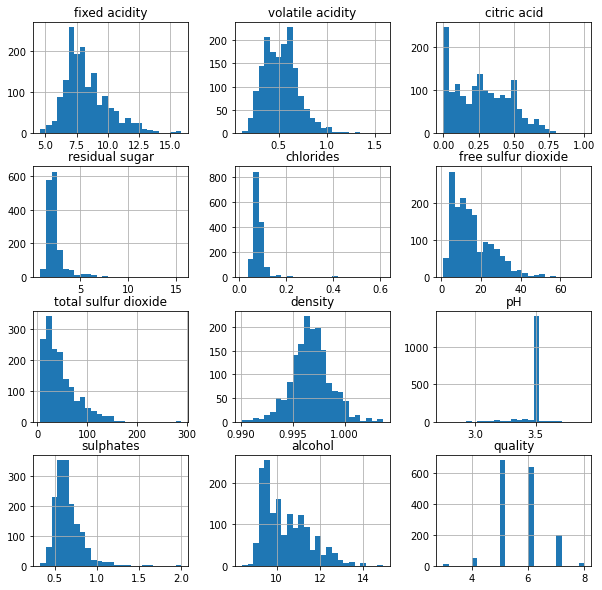

In [17]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

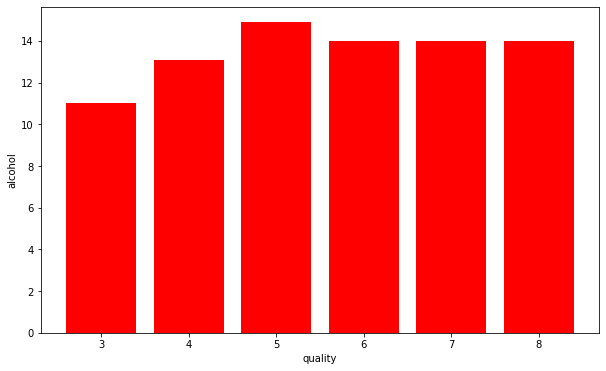

In [18]:
# Now, we plot the bar graph in which we check what value of alcohol can able to make cha
plt.figure(figsize=[10,6])
plt.bar(df['quality'],df['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

# Correlation

<AxesSubplot:>

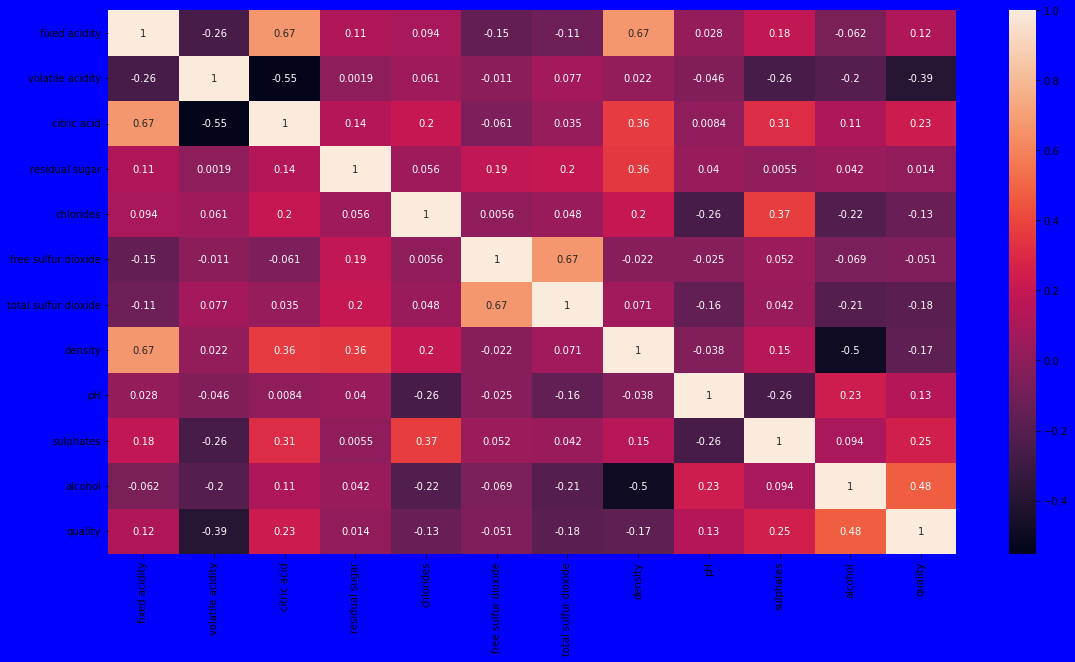

In [19]:
# Here im using a statistical method thats finds bonding and realtionship
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sb.heatmap(df.corr(),annot=True)

# Handling null values

In [28]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [30]:
#finding the duplicates records in the dataframe
df.duplicated().sum()


239

In [29]:
df.update(df.fillna(df.mean()))
# categorical variables
next_df = pd.get_dummies(df, drop_first=True)
# create df_dummies DataFrame and assign values to 'best quality' column
df_dummies = next_df.copy()
df_dummies["best quality"] = [1 if x >= 7 else 0 for x in df.quality]
# display new DataFrame
df_dummies

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0,0


# splitting data set

In [32]:
from sklearn.preprocessing import MinMaxScaler
# Creating normalization object
norm = MinMaxScaler()
# Fit data
norm_fit = norm.fit(X_train)
new_X_train = norm_fit.transform(X_train)
new_X_test = norm_fit.transform(X_test)
# Display values
print(new_X_train)

[[0.33628319 0.41322314 0.12       ... 0.33532934 0.52307692 0.6       ]
 [0.3539823  0.4338843  0.25       ... 0.16167665 0.24615385 0.6       ]
 [0.47787611 0.19008264 0.45       ... 0.05988024 0.15384615 0.4       ]
 ...
 [0.23893805 0.43801653 0.         ... 0.08383234 0.24615385 0.8       ]
 [0.28318584 0.33884298 0.33       ... 0.16167665 0.16923077 0.4       ]
 [0.38938053 0.39669421 0.29       ... 0.14371257 0.24615385 0.4       ]]


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# Fit data
fit_rnd = rnd.fit(new_X_train, y_train)
# Predicting score
rnd_score = rnd.score(new_X_test, y_test)
print('Score of the model is:', rnd_score)
# Calculating the error
print('Calculating the error')
# Predicting on the test set
y_pred = rnd.predict(new_X_test)
# Calculating mean squared error
rnd_MSE = mean_squared_error(y_test, y_pred)
# Calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# Display MSE
print('Mean squared error is:', rnd_MSE)
# Display RMSE
print('Root mean squared error is:', rnd_RMSE)
# Generating classification report
print(classification_report(y_test, y_pred))

Score of the model is: 1.0
Calculating the error
Mean squared error is: 0.0
Root mean squared error is: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00        48

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [34]:
x_predict = list(rnd.predict(new_X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
# Creating a new DataFrame
predicted_df = pd.DataFrame(predicted_df)
predicted_df.head(20)

,predicted_values,original_values
1035,1,1
49,0,0
799,0,0
538,1,1
660,0,0
990,0,0
398,0,0
1068,1,1
1155,0,0
468,0,0


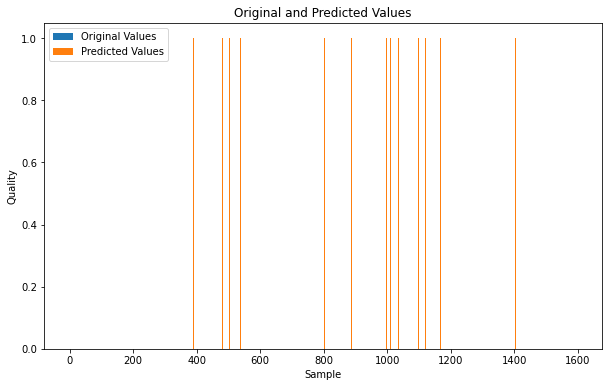

In [35]:
import matplotlib.pyplot as plt
# Creating DataFrame with predicted and original values
x_predict = list(rnd.predict(new_X_test))
predicted_df = {'predicted_values': x_predict, 'original_values': y_test}
predicted_df = pd.DataFrame(predicted_df)
# Visualizing the original and predicted values
plt.figure(figsize=(10, 6))
plt.bar(predicted_df.index, predicted_df['original_values'], label='Original Values')
plt.bar(predicted_df.index, predicted_df['predicted_values'], label='Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Quality')
plt.title('Original and Predicted Values')
plt.legend()
plt.show()

# conclusion
The code reads the dataset from a CSV or Excel file. It explores the data by plotting histograms and a bar
graph. It uses a heatmap to visualize the correlations between variables. Missing values are filled with the
mean of their respective columns. Categorical variables are converted to numerical using one-hot encoding.
The dataset is split into features (X) and the target variable (y). The data is further split into training and
testing sets using a 80-20 ratio. The features are scaled using MinMaxScaler. A Random Forest Classifier is
trained on the training data. The classifier is used to predict the target variable for the test set. Classification
metrics, including accuracy, precision, recall, and F1-score, are calculated and printed. A DataFrame,
predicted_df, is created to display the actual and predicted values. The conclusion of the code is that it trains
a Random Forest Classifier on the wine quality dataset and evaluates its performance on the test set. The
classification report provides metrics to assess the model's accuracy, precision, recall, and F1-score. The
predicted_df DataFrame shows the actual and predicted values side by side.
